# Import Modules

In [90]:
import os
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import warnings
import json
import sqlalchemy as sql
from pathlib import Path
import datetime
import yfinance as yf


from MCForecastTools import MCSimulation
warnings.filterwarnings('ignore')


%matplotlib inline

#warnings.filterwarnings("ignore")
#pd.options.display.float_format = '{:.4%}'.format

# Client Input Module

In [91]:
## Function to assess client risk profile
from clientprofile.client_risk_profile import client_risk_tolerance
client_risk = client_risk_tolerance()
print(f'Your risk factor is {client_risk}')
#type(client_risk)

A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance?4
B. On a scale of 1(Risky Avoidant) - 4(Risky), how would you describe your risk tolerance?4
C. What would you rather:1. Take $1,000 in cash  2. A 50% chance at winning $5,000  3. A 25% chance at winning $10,000  4. A 5% chance at winning $100,000  4
D. Define risk: 1. Loss 2. Uncertainty 3. Opportunity 4. Thrill 4
E. How comfortable on a scale of 1(Not Comfortable) - 4(Very Comfortable)are you with investing your money into stocks?4
Your risk factor is 1.0


In [92]:
# print(client_risk)

In [93]:
#### Client input for their investment horizon. 
investment_timeframe = input("What is the desired timeframe(in # of years) for your investment?")
investment_timeframe = int(investment_timeframe)

What is the desired timeframe(in # of years) for your investment?10


# Data Input for Universe (Multiple Asset Classes)

In [94]:
# Date range
today = datetime.date.today()
start_date = today - datetime.timedelta(days=365*5) #trading days(252) * amount of years to go back 

start = start_date.strftime("%Y-%m-%d")
end = today.strftime("%Y-%m-%d")

# Tickers of assets
assets = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "AAPL", "MSFT", "NVDA", "AMZN", "BRK-B",
         "GOOG", "META", "UNH", "XOM", "AGG", "BND", "LQD", "VCIT", "BNDX", "TMF", "TLT", "ICVT", "LKOR", "FBND"]
assets.sort()

# Downloading data
og_data = yf.download(assets, start = start, end = end)
data = og_data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

display(start)
display(end)
display(Y)

[*********************100%***********************]  30 of 30 completed


'2018-05-15'

'2023-05-14'

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,0.004362,-0.001887,0.008820,-0.002277,0.000183,-0.004465,-0.001637,0.001524,0.006898,-0.009009,...,0.004415,-0.002560,0.000683,0.002100,0.000979,0.010794,0.000797,0.002121,0.004741,-0.003098
2018-06-21,-0.005576,0.000283,-0.011348,0.000507,0.000365,-0.003377,0.000041,-0.010412,-0.009168,-0.001415,...,-0.018516,-0.002932,-0.012555,-0.007684,0.001957,0.005967,0.003384,-0.005762,-0.007123,-0.009447
2018-06-22,-0.002912,0.000945,-0.008409,0.000634,0.000183,0.000265,0.001189,-0.001883,-0.008748,-0.003034,...,0.019951,-0.004779,0.003455,-0.003238,0.008202,0.008742,0.006945,0.004494,-0.001704,0.021207
2018-06-25,-0.014872,-0.000567,-0.030612,-0.000127,-0.001644,-0.011540,0.000921,-0.026543,-0.014783,0.000000,...,-0.020093,-0.010713,-0.012670,-0.020763,0.005036,-0.002476,0.016551,-0.009184,-0.021739,-0.020152
2018-06-26,0.012406,0.001606,0.016799,0.001647,0.000000,-0.001553,0.000307,-0.005645,0.001395,0.005479,...,0.012629,-0.003361,0.003767,0.004039,-0.004240,0.005275,0.001163,-0.003090,0.007163,0.011287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,-0.000403,-0.005519,0.001609,-0.004743,-0.002252,0.006978,-0.004995,0.019065,0.004623,-0.011402,...,0.000000,0.001547,-0.003618,-0.000529,-0.002980,-0.006944,-0.003042,-0.002171,0.003397,0.003957
2023-05-09,-0.009971,-0.000908,0.007465,-0.001089,-0.000616,-0.003894,-0.000873,-0.002772,-0.000976,-0.000256,...,0.000374,-0.003706,0.002219,-0.007674,-0.003119,-0.003228,-0.001308,-0.006677,-0.000271,0.000275
2023-05-10,0.010421,0.006464,0.033483,0.006133,0.003695,-0.005787,0.005024,0.040207,0.004606,0.009089,...,-0.011338,-0.005580,-0.003623,0.012200,-0.001564,0.009444,0.009166,0.002794,0.005080,-0.012828


In [95]:
display(og_data)

Adj Close                                               \
                  AAPL        AGG        AMZN        BND       BNDX   
Date                                                                  
2018-05-15   44.544022  93.383202   78.806000  69.009628  47.834335   
2018-05-16   44.959740  93.276779   79.363998  68.956841  47.834335   
2018-05-17   44.675434  93.152580   79.087997  68.895271  47.790329   
2018-05-18   44.512962  93.392059   78.718498  69.079964  47.816738   
2018-05-21   44.828342  93.400940   79.273003  69.079964  47.834335   
...                ...        ...         ...        ...        ...   
2023-05-08  173.260345  99.099998  105.830002  73.449997  48.740002   
2023-05-09  171.532745  99.010002  106.620003  73.370003  48.709999   
2023-05-10  173.320267  99.650002  110.190002  73.820000  48.889999   
2023-05-11  173.510010  99.949997  112.180000  74.059998  49.090000   
2023-05-12  172.570007  99.389999  110.260002  73.669998  48.910000   

                                                                     ...  \
                 BRK-B       FBND        GOOG       ICVT       LKOR  ...   
Date                                                                 ...   
2018-05-15  197.360001  41.738655   53.961498  47.349056  40.323174  ...   
2018-05-16  197.830002  41.781662   54.088501  47.603134  40.177692  ...   
2018-05-17  197.490005  41.730076   53.929501  47.496582  40.080704  ...   
2018-05-18  196.059998  41.764473   53.318001  47.429363  40.080704  ...   
2018-05-21  197.910004  41.767906   53.979000  47.562153  40.129204  ...   
...                ...        ...         ...        ...        ...  ...   
2023-05-08  326.140015  45.820000  108.239998  71.709999  42.919998  ...   
2023-05-09  324.869995  45.779999  107.940002  71.639999  42.909000  ...   
2023-05-10  322.989990  46.009998  112.279999  71.970001  43.299000  ...   
2023-05-11  322.640015  46.169998  116.900002  71.904999  43.610001  ...   
2023-05-12  322.489990  45.959999  117.919998  71.820000  43.255001  ...   

              Volume                                                   \
                 XLE       XLF       XLI       XLK       XLP     XLRE   
Date                                                                    
2018-05-15  10482700  54655800  10180500  14262600  22686900  2371100   
2018-05-16  11997200  31984900   6281300   6680500  12151300  1562100   
2018-05-17  16271300  45070400   7519500  10800100  19572900  1758200   
2018-05-18  14092700  33266100   7482900   7882900  15664700  1395300   
2018-05-21  11513100  29647900  13744100  11289200   7928400  1477100   
...              ...       ...       ...       ...       ...      ...   
2023-05-08  16355900  34323600   7610200   3397800   8069200  3358700   
2023-05-09  20710600  29736200   8068100   6236600   6939500  2995000   
2023-05-10  18026000  39706100  12580500   5275900  12259100  3770000   
2023-05-11  19084100  36693200  11573800   4478400  11790600  3419800   
2023-05-12  18952700  36217700   8552400   3953300   7012000  2948700   

                                                  
                 XLU      XLV      XLY       XOM  
Date                                              
2018-05-15  11070700  8806800  4558000  12595700  
2018-05-16  13541300  7013600  3239200   9570000  
2018-05-17  11276000  6610400  6364500  11224100  
2018-05-18  11810400  5838900  4108900  10030900  
2018-05-21  10742000  6406500  8747300   8822400  
...              ...      ...      ...       ...  
2023-05-08   8286700  5305700  3425000  11187800  
2023-05-09  10281100  6452700  4232500  11370800  
2023-05-10  10708300  6556600  4514000  14884800  
2023-05-11  14874100  8764800  4144300  17165900  
2023-05-12  11874100  6626300  3778100  12608300  

[1258 rows x 180 columns]

# Client Scaling Factor

This code was added to ensure that the calculation from the client had a risk aversion factor between 0 and 1, where 0 is highly risk adverse & 1 is low risk aversion. 

In [96]:
# Client fear factor scaling. necessary as porfolio optimization solution uses an logarithmic estimation
x = client_risk

if (x >= 0) and (x < 0.25):
    fear_factor = 10000
    print(f'Client risk aversion is: {fear_factor}')

elif (x >= 0.25) and (x < 0.5):
        fear_factor = 3500
        print(f'Client risk aversion is: {fear_factor}')
elif (x >= 0.5) and (x <= 0.75):
        fear_factor = 2.5
        print(f'Client risk aversion is: {fear_factor}')
else:
    if (x >= 0.75) and (x <= 1):
        fear_factor = 0
        print(f'Client risk aversion is: {fear_factor}')
    else:
        print(f"Number isn't between 0 and 1")
       

Client risk aversion is: 0


# Portfolio Optimization using Risk Parity Model

In [97]:
import riskfolio as rp
#pd.options.display.float_format = '{:.4%}'.format

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Utility' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = fear_factor # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,8.392755e-09,1.066674e-08,1.468807e-08,1.067178e-08,1.041004e-08,1.558721e-08,1.090653e-08,1.899699e-08,1.382600e-08,1.106884e-08,...,1.533828e-08,1.343898e-08,1.427703e-08,1.947628e-08,1.515340e-08,1.378258e-08,1.498472e-08,1.519561e-08,1.397691e-08,1.731672e-08


# Optimal Portfolio

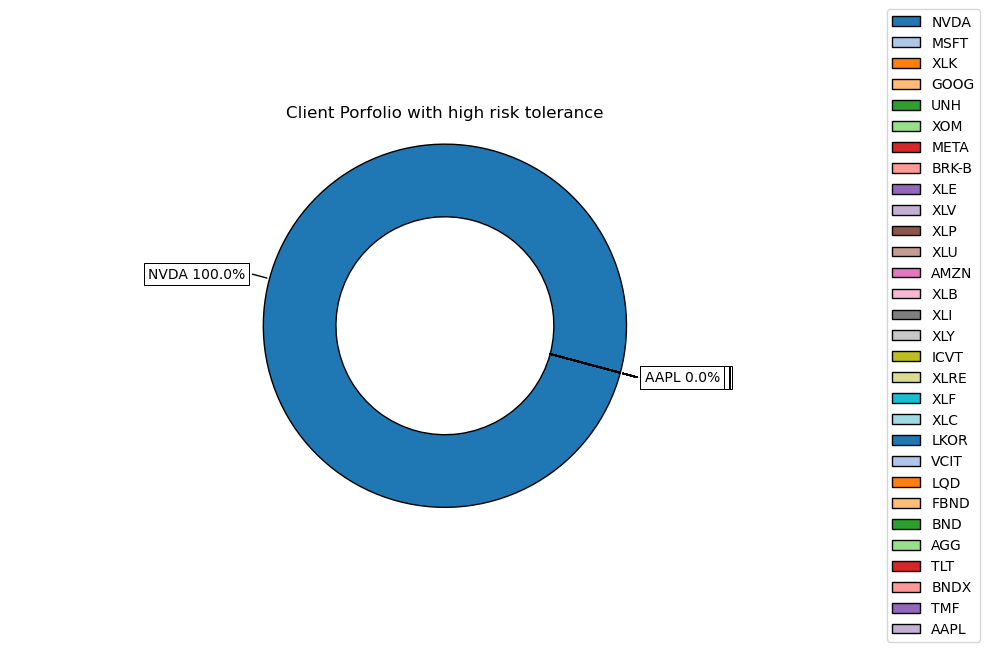

In [98]:
# plot the weights of the optimal portfolio
ax = rp.plot_pie(w=w, title='Client Porfolio with high risk tolerance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

# Code to print out image of results to share with client and include in readme commented out only necessary for reporting
#ax.get_figure().savefig('./images/risky_portfolio.png',bbox_inches = 'tight')

In [99]:
# Calculating the efficient frontier for the portfolio
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
0,5.070418e-09,4.781418e-07,4.252458e-09,1.022323e-07,0.973693,6.822856e-08,2.017017e-08,5.965102e-09,1.308381e-08,2.057330e-09,...,8.998239e-09,7.695165e-03,7.462654e-09,4.288244e-09,3.287054e-07,2.699925e-09,3.383899e-09,4.837849e-08,4.412681e-09,0.018611
1,5.383602e-02,1.474760e-01,7.374128e-11,5.288496e-09,0.708179,4.448021e-10,1.159109e-09,1.841740e-10,2.027604e-10,1.071673e-10,...,1.273946e-10,1.111733e-10,1.182933e-10,1.264962e-10,4.260789e-02,8.674369e-11,1.921488e-10,5.547429e-10,7.885135e-11,0.028134
2,7.730460e-02,2.154964e-01,5.650014e-11,3.224358e-09,0.585475,3.090447e-10,1.128869e-09,1.398238e-10,1.541069e-10,1.129675e-10,...,1.101170e-10,8.447061e-11,1.000467e-10,1.018142e-10,5.088392e-02,8.165886e-11,2.476649e-10,3.469963e-10,6.376918e-11,0.030162
3,9.747977e-02,2.739497e-01,3.051220e-10,2.092635e-08,0.480023,1.696963e-09,7.315503e-09,7.518584e-10,8.315054e-10,7.122039e-10,...,6.115297e-10,4.552353e-10,5.573169e-10,5.541599e-10,5.799547e-02,4.789609e-10,1.728989e-09,1.828269e-09,3.509938e-10,0.031906
4,1.157218e-01,2.981352e-01,2.532832e-11,1.954255e-09,0.395563,1.409207e-10,7.054745e-10,6.210982e-11,6.911027e-11,6.694871e-11,...,5.213711e-11,3.780964e-11,4.723531e-11,4.645444e-11,6.634595e-02,4.208784e-11,1.740217e-10,1.489084e-10,2.949414e-11,0.034935


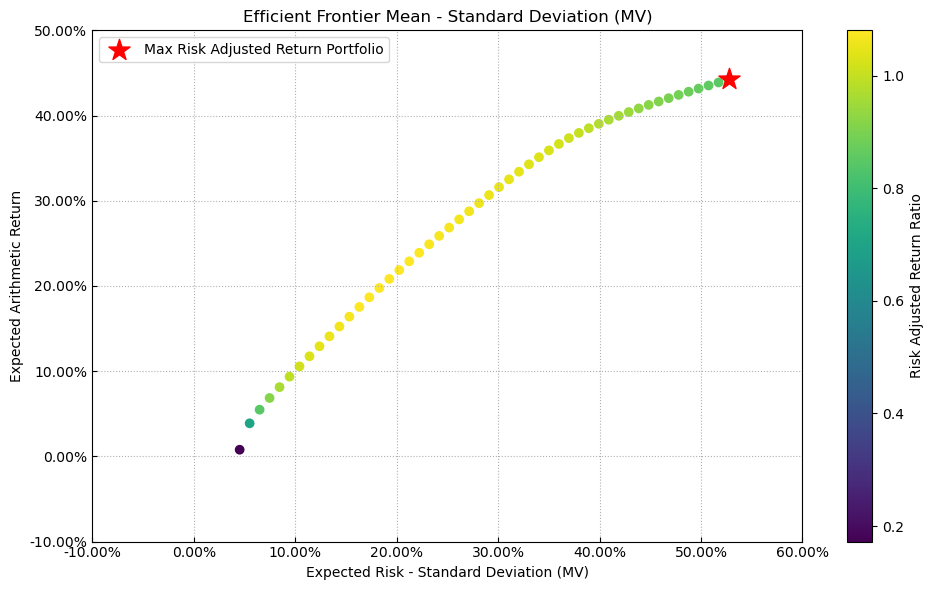

In [100]:
# plot the efficient frontier for the optimal porfolio

label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=frontier,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                        ax=None)
# Comment used to plot the efficent frontier for the optimal porfolio
#ax.get_figure().savefig('./images/risky_portfolio_efficient_frontier.png',bbox_inches = 'tight')

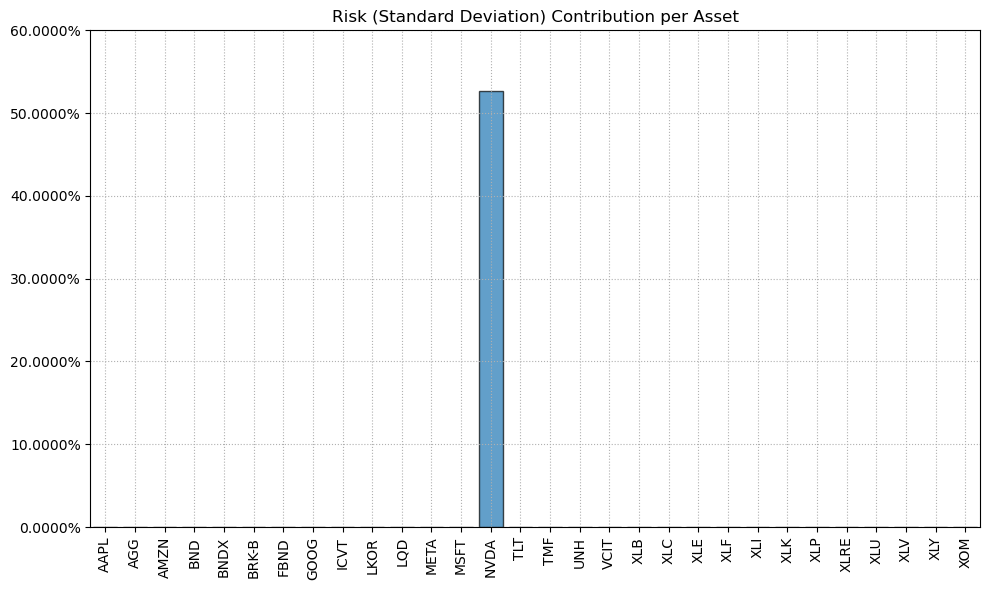

In [101]:
# plot for the standard deviation of the optimal portfolio

ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

# code to save image of the standard deviation
#ax.get_figure().savefig('./images/Risky Portfolio Standard Deviation.png',bbox_inches = 'tight')

In [102]:
# used to save weights to a csv file
#w.to_csv(Path("w.csv"))

# Portfolio Optimization (Assuming uniformly distributed risk across all assets)

Special case of risk parity (vanilla risk parity where risk is equally weighted across all assets) 

In [103]:
# Risk parity porfolio assuming that risk is eqaully distributed, where 'b' which is a constraint variable is set to none
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,8.392755e-09,1.066674e-08,1.468807e-08,1.067178e-08,1.041004e-08,1.558721e-08,1.090653e-08,1.899699e-08,1.382600e-08,1.106884e-08,...,1.533828e-08,1.343898e-08,1.427703e-08,1.947628e-08,1.515340e-08,1.378258e-08,1.498472e-08,1.519561e-08,1.397691e-08,1.731672e-08


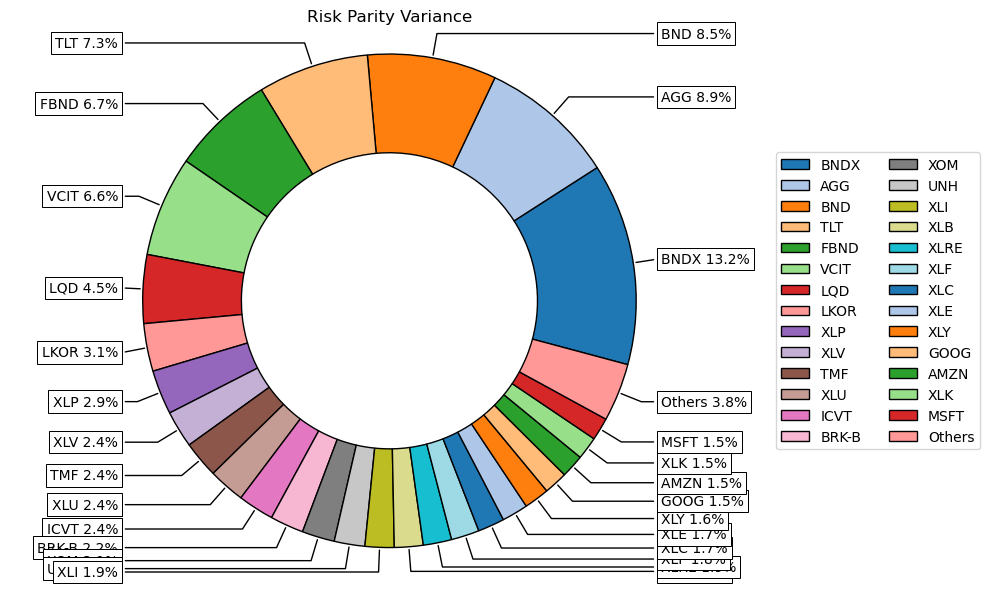

In [104]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

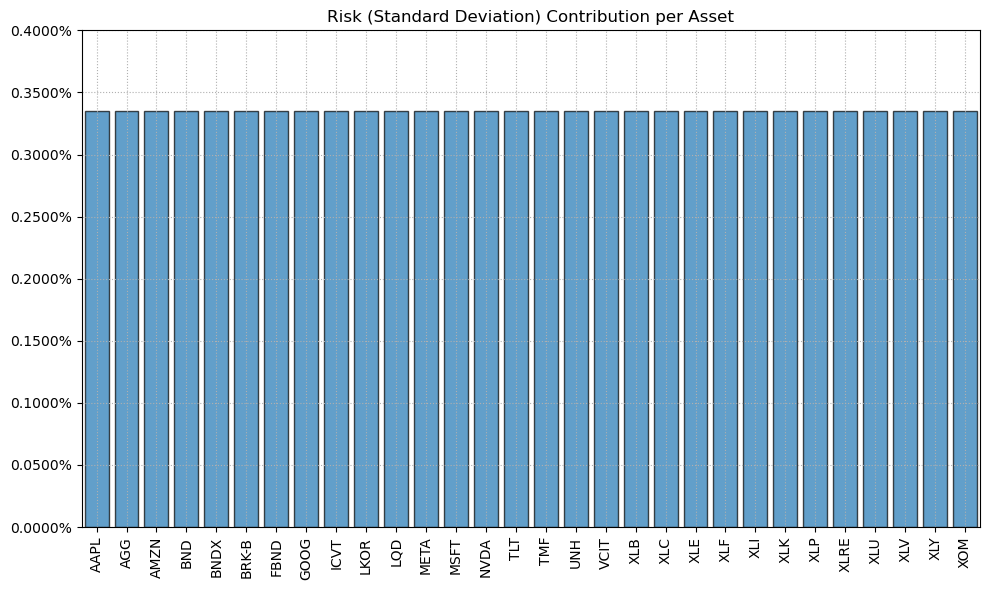

In [105]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

# Monte Carlo Simulation

In [106]:
#using the weight 'w' from the optimal portfolio as the weights to simulate the projected returns from the portfolio


#portfolio_path = Path("w.csv")
#portfolio_df = pd.read_csv(portfolio_path)
#display(w)

# Monte Carlo simulation is on the optimal portfolio
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

portfolio_df = w
portfolio_df = portfolio_df.reset_index()
portfolios_headers = ["Ticker", "Weight"]
portfolio_df.columns = portfolios_headers
portfolio_df['Weight'] = portfolio_df['Weight'].apply(lambda x: "{:.10f}".format(x))
portfolio_df['Weight'] = portfolio_df['Weight'].astype(float)
portfolio_df.head()

,Ticker,Weight
0,AAPL,8.400000e-09
1,AGG,1.070000e-08
2,AMZN,1.470000e-08
3,BND,1.070000e-08
4,BNDX,1.040000e-08


In [107]:
#Creating lists of tickers and weights to be used in the Monte Carlo simulation

tickers = portfolio_df["Ticker"].tolist()
weights_list = portfolio_df["Weight"].tolist()
weights_list

# test to ensure weights are float
#for i in weights_list:
   # print(type(i))
    

[8.4e-09,
 1.07e-08,
 1.47e-08,
 1.07e-08,
 1.04e-08,
 1.56e-08,
 1.09e-08,
 1.9e-08,
 1.38e-08,
 1.11e-08,
 1.1e-08,
 1.58e-08,
 2.06e-08,
 0.9999995971,
 1.04e-08,
 9.5e-09,
 1.9e-08,
 1.11e-08,
 1.44e-08,
 1.29e-08,
 1.53e-08,
 1.34e-08,
 1.43e-08,
 1.95e-08,
 1.52e-08,
 1.38e-08,
 1.5e-08,
 1.52e-08,
 1.4e-08,
 1.73e-08]

In [108]:
#Getting the open, close and daily return for the tickers in the portfolio and creating a dataframe with the data

dfs = []

for ticker in tickers:
    data = yf.download(ticker, start, interval='1d')
    open_df = pd.DataFrame(data['Open']).rename(columns={'Open': 'open'})
    adj_close_df = pd.DataFrame(data['Adj Close']).rename(columns={'Adj Close': 'close'})
    daily_return_df = pd.DataFrame(data['Adj Close'].pct_change()).rename(columns={'Adj Close': 'daily_return'})
    dfs.append(pd.concat([open_df, adj_close_df, daily_return_df], axis=1, keys=[ticker]*3))

data = pd.concat(dfs, axis=1).dropna()
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

AAPL                                  AGG             \
                  open       close daily_return        open      close   
Date                                                                     
2018-06-20   46.587502   44.558350     0.004362  106.059998  94.064400   
2018-06-21   46.812500   44.309879    -0.005576  105.879997  94.091080   
2018-06-22   46.529999   44.180878    -0.002911  105.820000  94.179970   
2018-06-25   45.849998   43.523834    -0.014872  105.949997  94.126633   
2018-06-26   45.747501   44.063801     0.012406  105.989998  94.277756   
...                ...         ...          ...         ...        ...   
2023-05-08  172.479996  173.260345    -0.000403   99.209999  99.099998   
2023-05-09  173.050003  171.532745    -0.009971   99.110001  99.010002   
2023-05-10  173.020004  173.320267     0.010421   99.430000  99.650002   
2023-05-11  173.850006  173.510010     0.001095  100.110001  99.949997   
2023-05-12  173.619995  172.570007    -0.005418   99.889999  99.389999   

                               AMZN                                 BND  ...  \
           daily_return        open       close daily_return       open  ...   
Date                                                                     ...   
2018-06-20    -0.001887   87.125000   87.503998     0.008820  79.050003  ...   
2018-06-21     0.000284   88.000000   86.511002    -0.011348  78.930000  ...   
2018-06-22     0.000945   87.130997   85.783501    -0.008409  78.919998  ...   
2018-06-25    -0.000566   85.125504   83.157501    -0.030612  79.000000  ...   
2018-06-26     0.001606   83.618500   84.554497     0.016799  79.000000  ...   
...                 ...         ...         ...          ...        ...  ...   
2023-05-08    -0.005519  105.040001  105.830002     0.001609  73.500000  ...   
2023-05-09    -0.000908  105.480003  106.620003     0.007465  73.430000  ...   
2023-05-10     0.006464  108.099998  110.190002     0.033483  73.680000  ...   
2023-05-11     0.003010  111.029999  112.180000     0.018060  74.180000  ...   
2023-05-12    -0.005603  112.160004  110.260002    -0.017115  74.010002  ...   

                    XLU         XLV                                  XLY  \
           daily_return        open       close daily_return        open   
Date                                                                       
2018-06-20     0.000797   84.970001   78.318878     0.002121  112.360001   
2018-06-21     0.003385   84.959999   77.867630    -0.005762  112.470001   
2018-06-22     0.006944   84.860001   78.217598     0.004494  112.000000   
2018-06-25     0.016552   84.610001   77.499222    -0.009184  110.860001   
2018-06-26     0.001163   84.220001   77.259781    -0.003090  109.309998   
...                 ...         ...         ...          ...         ...   
2023-05-08    -0.003042  133.389999  133.300003    -0.002171  147.639999   
2023-05-09    -0.001308  132.789993  132.410004    -0.006677  146.880005   
2023-05-10     0.009166  132.789993  132.779999     0.002794  149.009995   
2023-05-11    -0.010236  132.500000  132.369995    -0.003088  148.490005   
2023-05-12     0.005535  132.570007  132.190002    -0.001360  149.600006   

                                            XOM                           
                 close daily_return        open       close daily_return  
Date                                                                      
2018-06-20  106.909904     0.004741   80.849998   62.641460    -0.003098  
2018-06-21  106.148392    -0.007123   80.019997   62.049706    -0.009447  
2018-06-22  105.967514    -0.001704   81.160004   63.365593     0.021207  
2018-06-25  103.663864    -0.021739   80.779999   62.088638    -0.020152  
2018-06-26  104.406372     0.007163   80.150002   62.789402     0.011287  
...                ...          ...         ...         ...          ...  
2023-05-08  147.690002     0.003397  110.500000  109.110001     0.003957  
2023-05-09  147.649994    -0.000271  108.3399

In [109]:
#setting the inputs for the Monte Carlo simulation

thirty_year_simulation = MCSimulation(
    portfolio_data=data,
    weights=weights_list,   
    num_simulation=100,
    num_trading_days=252*investment_timeframe
)


thirty_year_simulation.portfolio_data.head()


AAPL                                 AGG             \
                 open      close daily_return        open      close   
Date                                                                   
2018-06-20  46.587502  44.558350     0.004362  106.059998  94.064400   
2018-06-21  46.812500  44.309879    -0.005576  105.879997  94.091080   
2018-06-22  46.529999  44.180878    -0.002911  105.820000  94.179970   
2018-06-25  45.849998  43.523834    -0.014872  105.949997  94.126633   
2018-06-26  45.747501  44.063801     0.012406  105.989998  94.277756   

                              AMZN                                BND  ...  \
           daily_return       open      close daily_return       open  ...   
Date                                                                   ...   
2018-06-20    -0.001887  87.125000  87.503998     0.008820  79.050003  ...   
2018-06-21     0.000284  88.000000  86.511002    -0.011348  78.930000  ...   
2018-06-22     0.000945  87.130997  85.783501    -0.008409  78.919998  ...   
2018-06-25    -0.000566  85.125504  83.157501    -0.030612  79.000000  ...   
2018-06-26     0.001606  83.618500  84.554497     0.016799  79.000000  ...   

                    XLU        XLV                                 XLY  \
           daily_return       open      close daily_return        open   
Date                                                                     
2018-06-20     0.000797  84.970001  78.318878     0.002121  112.360001   
2018-06-21     0.003385  84.959999  77.867630    -0.005762  112.470001   
2018-06-22     0.006944  84.860001  78.217598     0.004494  112.000000   
2018-06-25     0.016552  84.610001  77.499222    -0.009184  110.860001   
2018-06-26     0.001163  84.220001  77.259781    -0.003090  109.309998   

                                           XOM                          
                 close daily_return       open      close daily_return  
Date                                                                    
2018-06-20  106.909904     0.004741  80.849998  62.641460    -0.003098  
2018-06-21  106.148392    -0.007123  80.019997  62.049706    -0.009447  
2018-06-22  105.967514    -0.001704  81.160004  63.365593     0.021207  
2018-06-25  103.663864    -0.021739  80.779999  62.088638    -0.020152  
2018-06-26  104.406372     0.007163  80.150002  62.789402     0.011287  

[5 rows x 90 columns]

In [110]:
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981805,0.971496,0.965856,1.035153,0.963736,1.031989,1.022356,0.964292,1.007519,0.979927,...,1.069919,1.011445,0.986254,0.971165,1.024759,0.962892,1.044855,0.975818,1.006901,0.967901
2,0.926437,0.934733,0.996523,1.084161,0.978808,1.021423,1.023276,0.928556,0.994831,0.974965,...,1.088828,0.986527,0.994693,1.015492,1.010561,0.968310,1.098050,0.946074,0.978189,0.920970
3,0.914949,0.967551,0.995575,1.083281,0.919087,1.032342,0.991466,0.902811,1.038675,0.990082,...,1.096364,1.002094,0.932954,1.000767,1.039044,0.974899,1.130627,0.960986,0.987881,0.901546
4,0.938025,0.985180,1.003178,1.112661,0.882403,1.013982,1.000504,0.879156,1.052541,0.988512,...,1.094008,1.050663,0.954450,0.985112,0.991597,0.924318,1.072054,0.936627,1.008387,0.946515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.057882,20.194477,137.395490,51.957559,111.587919,43.012416,11.191856,76.051522,106.085939,103.237342,...,9.484227,5.061727,61.793342,4.786596,66.431906,4.801230,12.970488,12.963519,4.398995,28.848911
2517,2.124172,20.279537,134.620710,48.663901,109.184745,43.080051,11.565714,78.782023,110.213338,100.602077,...,9.687135,5.193277,63.344768,5.014982,66.852488,5.166863,12.972764,13.386636,4.336929,29.273420
2518,2.193429,21.203785,129.820180,49.409606,109.314726,41.833478,11.828962,77.453283,111.021516,92.592455,...,10.137719,5.249070,63.769164,5.072095,67.432162,4.749380,12.328361,13.689221,4.348832,28.403432
2519,2.208245,22.594082,128.599469,52.347162,107.846752,44.778985,11.067602,80.160258,112.248955,94.933610,...,9.786729,5.211351,63.163920,4.988997,66.831411,4.837868,11.949241,14.215721,4.404010,29.133084


<Axes: title={'center': '100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

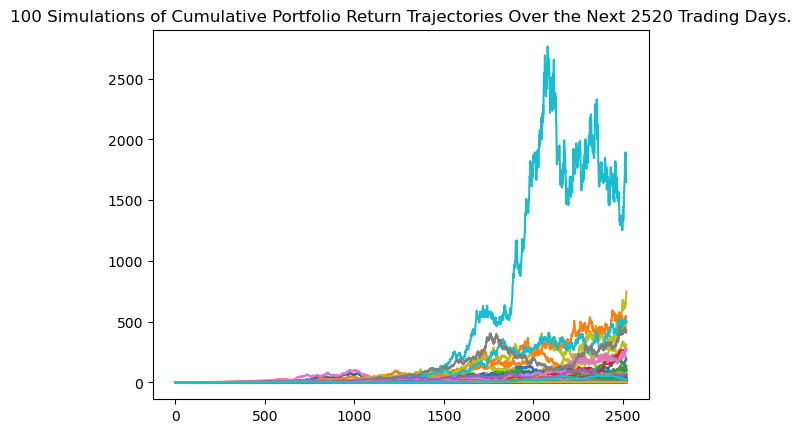

In [111]:
thirty_year_simulation.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 100 Simulations'}, ylabel='Frequency'>

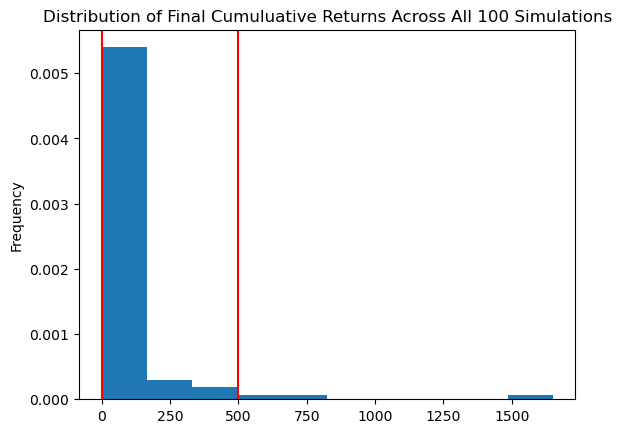

In [112]:
thirty_year_simulation.plot_distribution()

In [113]:
thirty_year_simulation_statistics = thirty_year_simulation.summarize_cumulative_return()
thirty_year_simulation_statistics

count            100.000000
mean              80.629501
std              202.039315
min                0.493670
25%                5.304011
50%               17.917648
75%               63.271012
max             1649.130368
95% CI Lower       1.081652
95% CI Upper     498.692117
Name: 2520, dtype: float64

In [114]:
ci_lower_ten_cumulative_return = thirty_year_simulation_statistics[8]
ci_upper_ten_cumulative_return = thirty_year_simulation_statistics[9]

In [115]:
print(f"There is a 95% chance that the portfolio will provide returns within in the range of"
      f" {ci_lower_ten_cumulative_return: .2f} and {ci_upper_ten_cumulative_return: .2f} percent"
      f" over {investment_timeframe: .0f} years")

There is a 95% chance that the portfolio will provide returns within in the range of  1.08 and  498.69 percent over  10 years
